In [24]:
import seaborn as sns
import os
import glob
import re
import pandas as pd
from matplotlib import pyplot as plt

In [56]:
def load_decoding_accuracies(results_dir):
    """
    Scan `results_dir` for files like:
      sub-01_ses-01_overt_covert_rest_accuracy.csv
    Extract subject/session IDs and load the accuracy value from each file.

    Parameters
    ----------
    results_dir : str
        Path to the folder containing your *_accuracy.csv files.

    Returns
    -------
    List[dict]
        A list of records, each with keys:
        - 'subject_id' : str
        - 'session_id' : str
        - 'accuracy'   : float
    """
    pattern = os.path.join(results_dir, "*_accuracy.csv")
    files = glob.glob(pattern)
    records = []

    # Regex to pull out sub-XX and ses-XX
    filename_re = re.compile(r"sub-([0-9a-zA-Z]+)_ses-([0-9a-zA-Z]+)_.*_accuracy\.csv")

    for filepath in files:
        fname = os.path.basename(filepath)
        m = filename_re.match(fname)
        if not m:
            # skip files that don't match the naming convention
            continue

        subject_id, session_id = m.groups()

        # Read the CSV
        df = pd.read_csv(filepath)

        # Try to grab an 'accuracy' column, otherwise fall back to first cell
        if "accuracy" in df.columns:
            accuracy = df["accuracy"].iloc[0]
        else:
            accuracy = df.iloc[0, 0]

        records.append({
            "subject_id": subject_id,
            "session_id": session_id,
            "accuracy": float(accuracy)
        })

    return records


results = load_decoding_accuracies("DecodingResults")
for rec in results:
    print(f"Sub {rec['subject_id']} | Ses {rec['session_id']} → Accuracy = {rec['accuracy']:.3f}")

Sub 02 | Ses 01 → Accuracy = 0.572
Sub 01 | Ses 01 → Accuracy = 0.621
Sub 04 | Ses 02 → Accuracy = 0.634
Sub 10 | Ses 01 → Accuracy = 0.647
Sub 12 | Ses 02 → Accuracy = 0.748
Sub 13 | Ses 01 → Accuracy = 0.784
Sub 06 | Ses 02 → Accuracy = 0.690
Sub 08 | Ses 01 → Accuracy = 0.876
Sub 09 | Ses 02 → Accuracy = 0.876
Sub 15 | Ses 01 → Accuracy = 0.765
Sub 13 | Ses 02 → Accuracy = 0.794
Sub 09 | Ses 01 → Accuracy = 0.824
Sub 07 | Ses 01 → Accuracy = 0.647
Sub 14 | Ses 01 → Accuracy = 0.761
Sub 11 | Ses 01 → Accuracy = 0.709
Sub 12 | Ses 01 → Accuracy = 0.755
Sub 03 | Ses 01 → Accuracy = 0.807
Sub 06 | Ses 01 → Accuracy = 0.725
Sub 05 | Ses 02 → Accuracy = 0.797
Sub 15 | Ses 02 → Accuracy = 0.924
Sub 04 | Ses 01 → Accuracy = 0.863
Sub 05 | Ses 01 → Accuracy = 0.739


In [57]:
results = pd.DataFrame(results)
results.describe()

,accuracy
count,22.000000
mean,0.752638
std,0.092073
min,0.571895
25%,0.694444
50%,0.758170
75%,0.804739
max,0.924051


In [60]:
new = results.groupby(by='subject_id')['accuracy'].mean().reset_index()
new

,subject_id,accuracy
0,01,0.620915
1,02,0.571895
2,03,0.807190
3,04,0.748366
4,05,0.767974
5,06,0.707516
6,07,0.647059
7,08,0.875817
8,09,0.849673
9,10,0.647059


In [68]:
new.min(), new.max()

(subject_id          01
 accuracy      0.571895
 dtype: object,
 subject_id          15
 accuracy      0.875817
 dtype: object)

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_accuracy_per_subject(df):
    """
    Plots the maximum sparse validation accuracy per subject with enhanced aesthetics.

    Parameters:
    - df (pd.DataFrame): DataFrame containing 'subject_id' and 'accuracy'.
    """
    subject_acc = df.groupby('subject_id')['accuracy'].mean().reset_index()
    subject_acc = subject_acc.sort_values('accuracy')

    plt.figure(figsize=(14, 7))
    palette = sns.color_palette("viridis", len(subject_acc))

    # Create barplot
    ax = sns.barplot(
        x='subject_id',
        y='accuracy',
        data=subject_acc,
        palette=palette,
        edgecolor='black',
        linewidth=1.5
    )

    # Set font sizes and labels
    ax.set_xlabel('Subject ID', fontsize=18, labelpad=15)
    ax.set_ylabel('Validation Accuracy', fontsize=18, labelpad=15)

    # Set tick sizes
    ax.tick_params(axis='x', labelsize=16, rotation=45)
    ax.tick_params(axis='y', labelsize=16)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add gridlines
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)

    # Tight layout and save
    plt.tight_layout()
    plt.savefig('final/overt_covert_rest_accuracy.png', dpi=600)
    plt.show()


/tmp/ipykernel_1697192/1261772579.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


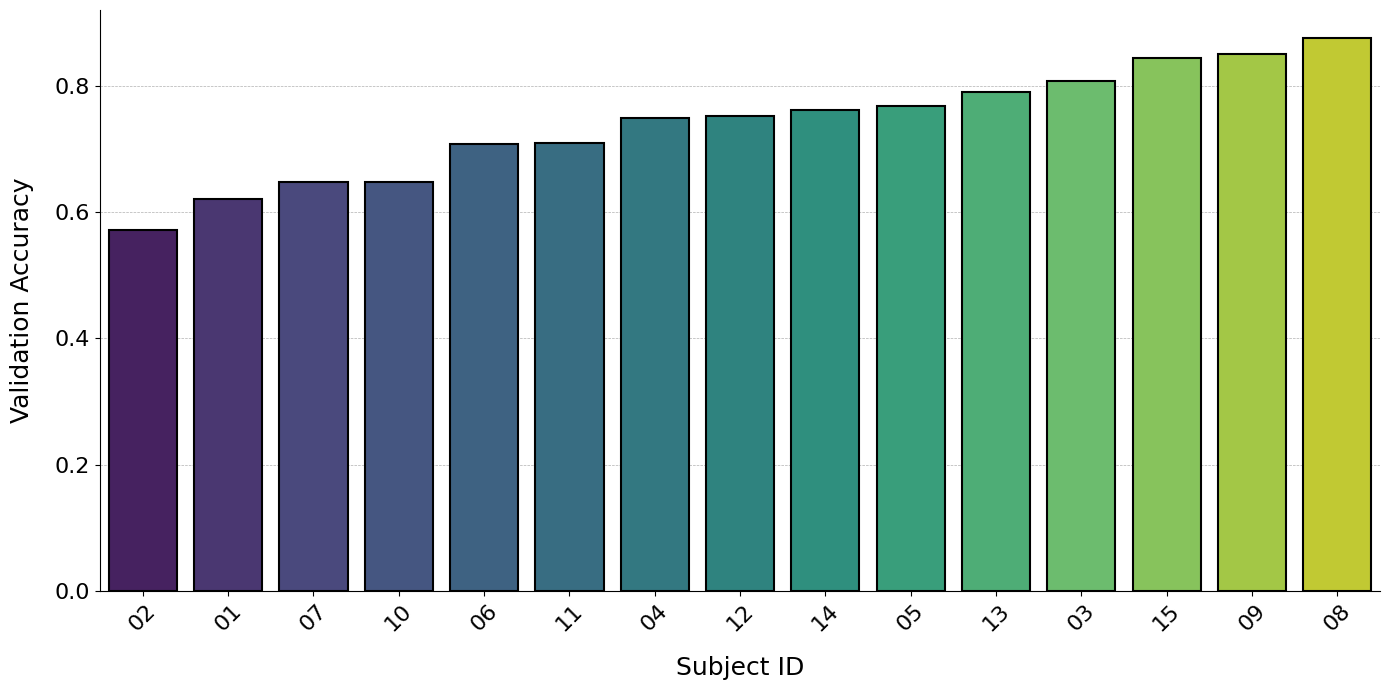

In [67]:
plot_accuracy_per_subject(results)

In [69]:
import os
import glob
import re
import pandas as pd

def load_decoding_accuracies(results_dir):
    """
    Scan `results_dir` for files like:
      sub-13_ses-01_classification_report.csv
    Extract subject/session IDs and load precision, recall, f1 from each file.

    Parameters
    ----------
    results_dir : str
        Path to the folder containing your *_classification_report.csv files.

    Returns
    -------
    List[dict]
        A list of records, each with keys:
        - 'subject_id' : str
        - 'session_id' : str
        - 'precision'  : float
        - 'recall'     : float
        - 'f1'         : float
    """
    pattern = os.path.join(results_dir, "*_classification_report.csv")
    files = glob.glob(pattern)
    records = []

    # Regex to extract subject and session IDs
    # Example filename: sub-13_ses-01_classification_report.csv
    filename_re = re.compile(r"sub-(\d+)_ses-(\d+)_classification_report\.csv")

    for filepath in files:
        fname = os.path.basename(filepath)
        m = filename_re.match(fname)
        if not m:
            # Skip files that don't match the naming convention
            continue

        subject_id, session_id = m.groups()

        # Read the CSV, assuming the file is a classification report
        df = pd.read_csv(filepath)

        # You need to define this function to extract precision, recall, f1
        # or you can compute average metrics from the report, e.g., weighted average
        p, r, f = get_precision_recall_f1(df)

        records.append({
            "subject_id": subject_id,
            "session_id": session_id,
            "precision": p,
            "recall": r,
            "f1": f
        })

    return records

# Dummy example of get_precision_recall_f1 function
def get_precision_recall_f1(df):
    """
    Assuming df is a classification report with rows for each class,
    and columns like 'precision', 'recall', 'f1-score', and a row 'weighted avg'.

    This function extracts the weighted average precision, recall, f1.

    Modify this depending on your CSV structure.
    """
    try:
        weighted = df[df['class'] == 'weighted avg'].iloc[0]
        p = float(weighted['precision'])
        r = float(weighted['recall'])
        f = float(weighted['f1-score'])
    except Exception:
        # fallback to mean of all classes except totals
        p = df['precision'].mean()
        r = df['recall'].mean()
        f = df['f1-score'].mean()
    return p, r, f


# Example usage:
results = load_decoding_accuracies("DecodingResults")
for rec in results:
    print(f"Sub {rec['subject_id']} | Ses {rec['session_id']} → "
          f"Precision={rec['precision']:.3f}, Recall={rec['recall']:.3f}, F1={rec['f1']:.3f}")


Sub 05 | Ses 02 → Precision=0.800, Recall=0.797, F1=0.791
Sub 11 | Ses 01 → Precision=0.705, Recall=0.709, F1=0.702
Sub 08 | Ses 01 → Precision=0.878, Recall=0.876, F1=0.876
Sub 05 | Ses 01 → Precision=0.739, Recall=0.739, F1=0.737
Sub 10 | Ses 01 → Precision=0.672, Recall=0.647, F1=0.633
Sub 13 | Ses 01 → Precision=0.797, Recall=0.784, F1=0.780
Sub 15 | Ses 02 → Precision=0.925, Recall=0.924, F1=0.923
Sub 12 | Ses 02 → Precision=0.748, Recall=0.748, F1=0.742
Sub 14 | Ses 01 → Precision=0.773, Recall=0.761, F1=0.753
Sub 06 | Ses 01 → Precision=0.757, Recall=0.725, F1=0.719
Sub 09 | Ses 02 → Precision=0.882, Recall=0.876, F1=0.874
Sub 07 | Ses 01 → Precision=0.653, Recall=0.647, F1=0.641
Sub 04 | Ses 02 → Precision=0.746, Recall=0.634, F1=0.621
Sub 09 | Ses 01 → Precision=0.831, Recall=0.824, F1=0.825
Sub 12 | Ses 01 → Precision=0.776, Recall=0.755, F1=0.745
Sub 01 | Ses 01 → Precision=0.666, Recall=0.621, F1=0.597
Sub 15 | Ses 01 → Precision=0.810, Recall=0.765, F1=0.765
Sub 02 | Ses 0

In [70]:
pd.DataFrame(results.groupby(by=['subject_id', 'session']))

,subject_id,session_id,precision,recall,f1
0,05,02,0.800408,0.797386,0.791048
1,11,01,0.705441,0.709150,0.701799
2,08,01,0.878213,0.875817,0.875752
3,05,01,0.738903,0.738562,0.736747
4,10,01,0.671622,0.647059,0.633043
5,13,01,0.797040,0.784314,0.780159
6,15,02,0.924667,0.924208,0.923112
7,12,02,0.748196,0.748366,0.742259
8,14,01,0.772840,0.761438,0.753388
9,06,01,0.756898,0.725490,0.719272


In [71]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics_per_subject(records):
    """
    Plot precision, recall, and f1 score per subject.

    Parameters
    ----------
    records : List[dict]
        Each dict must have keys:
        - 'subject_id' : str
        - 'precision'  : float
        - 'recall'     : float
        - 'f1'         : float
    """

    # Aggregate metrics by subject (average over sessions)
    from collections import defaultdict

    metrics_by_subject = defaultdict(lambda: {'precision': [], 'recall': [], 'f1': []})

    for rec in records:
        sid = rec['subject_id']
        metrics_by_subject[sid]['precision'].append(rec['precision'])
        metrics_by_subject[sid]['recall'].append(rec['recall'])
        metrics_by_subject[sid]['f1'].append(rec['f1'])

    # Compute average metrics per subject
    subjects = sorted(metrics_by_subject.keys(), key=lambda x: int(x))  # Sort by numeric ID
    precision_avg = [np.mean(metrics_by_subject[s]['precision']) for s in subjects]
    recall_avg = [np.mean(metrics_by_subject[s]['recall']) for s in subjects]
    f1_avg = [np.mean(metrics_by_subject[s]['f1']) for s in subjects]

    # Plot
    x = np.arange(len(subjects))
    width = 0.25

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width, precision_avg, width, label='Precision', color='tab:blue')
    ax.bar(x, recall_avg, width, label='Recall', color='tab:orange')
    ax.bar(x + width, f1_avg, width, label='F1 Score', color='tab:green')

    ax.set_xticks(x)
    ax.set_xticklabels(subjects)
    ax.set_xlabel('Subject ID')
    ax.set_ylabel('Score')
    #ax.set_title('Precision, Recall, and F1 Score per Subject (averaged over sessions)')
    plt.tight_layout()
    ax.set_xticks(x)
    ax.set_xticklabels(subjects, fontsize=16)
    ax.set_xlabel('Subject ID', fontsize=18, labelpad=10)
    ax.set_ylabel('Score', fontsize=18, labelpad=10)
    ax.set_ylim(0, 1)
    ax.legend(fontsize=14)


    ax.set_yticks(np.round(ax.get_yticks(), 2))  # ensure clean tick positions
    ax.set_yticklabels([f"{tick:.2f}" for tick in ax.get_yticks()], fontsize=16)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)



    plt.savefig('final/overt_covert_rest_metrics.png', dpi=600)


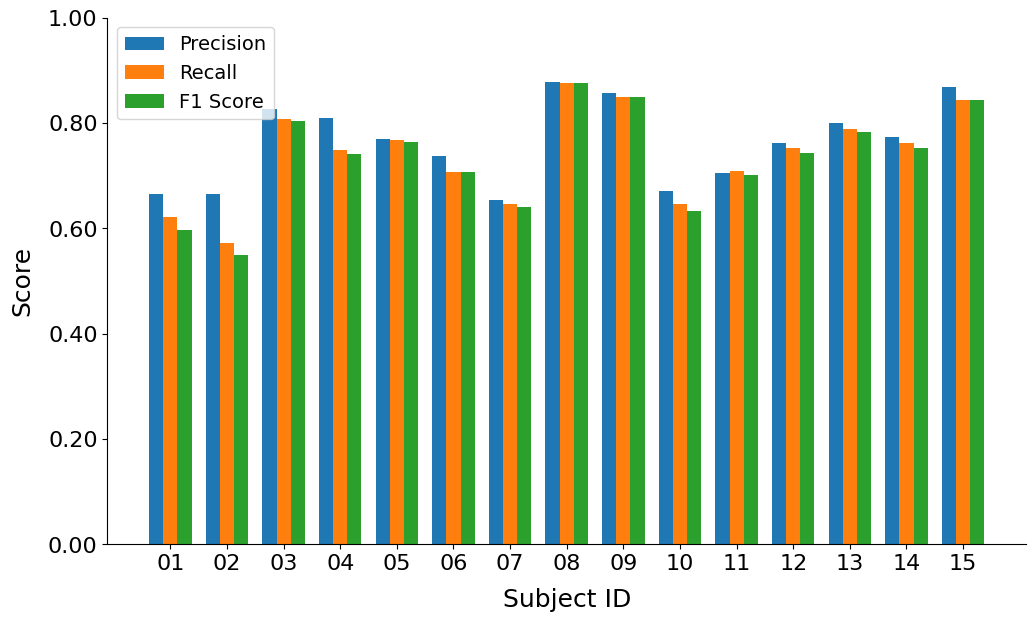

In [72]:
plot_metrics_per_subject(results)

In [73]:
import os
import glob
import re
import pandas as pd

def load_decoding_accuracies_per_class(results_dir):
    """
    Scan `results_dir` for files like:
      sub-13_ses-01_classification_report.csv

    Extract precision, recall, f1 for each class from each file.

    Parameters
    ----------
    results_dir : str
        Path to the folder containing *_classification_report.csv files.

    Returns
    -------
    pd.DataFrame
        Columns: ['subject_id', 'session_id', 'class_id', 'precision', 'recall', 'f1']
    """
    pattern = os.path.join(results_dir, "*_classification_report.csv")
    files = glob.glob(pattern)

    filename_re = re.compile(r"sub-(\d+)_ses-(\d+)_classification_report\.csv")
    records = []

    for filepath in files:
        fname = os.path.basename(filepath)
        m = filename_re.match(fname)
        if not m:
            continue

        subject_id, session_id = m.groups()

        # Load CSV assuming no header in first column (which holds class label)
        df = pd.read_csv(filepath)
        
        # Rename the first column (index column) to 'class'
        df.rename(columns={df.columns[0]: 'class'}, inplace=True)

        # Keep only rows where 'class' is a digit (i.e., individual classes)
        df = df[df['class'].apply(lambda x: str(x).isdigit())].copy()

        for _, row in df.iterrows():
            class_id = int(row['class'])
            records.append({
                "subject_id": subject_id,
                "session_id": session_id,
                "class_id": class_id,
                "precision": float(row['precision']),
                "recall": float(row['recall']),
                "f1": float(row['f1-score'])
            })

    return pd.DataFrame(records)


# Example usage:
df = load_decoding_accuracies_per_class("DecodingResults")
print(df.head())


  subject_id session_id  class_id  precision    recall        f1
0         05         02         0   0.819672  0.980392  0.892857
1         05         02         1   0.747748  0.813725  0.779343
2         05         02         2   0.835616  0.598039  0.697143
3         11         01         0   0.728682  0.921569  0.813853
4         11         01         1   0.718750  0.676471  0.696970


In [74]:
precision = df.groupby(by=['subject_id', 'session_id','class_id'])['precision'].mean().reset_index()
precision = precision.groupby(by='class_id')['precision'].mean().values
precision

array([0.78204786, 0.77288742, 0.78312008])

In [75]:
recall = df.groupby(by=['subject_id', 'session_id','class_id'])['recall'].mean().reset_index()
recall = recall.groupby(by='class_id')['recall'].mean().values
recall

array([0.91313588, 0.71170921, 0.63310127])

In [76]:
f1 = df.groupby(by='class_id')['f1'].mean().values
f1

array([0.82825888, 0.72109669, 0.68605758])